## 02-Lab  - Polynomial Regression

In this lab, you will work with Auto dataset which we had seen while Introducing Data Science .
The dataset contains information about varoious cars/automobiles, the number of wheels, engine displacement along with their fuel efficiency.
Your task is to fit a Polynomial model, and predict the miles-per-gallon(mpg) based on suitable input variables.
You are required to do the data manipulation, polynomial conversion (of suitable degree), perform train-test splits,etc to create the model.

Data is availabe in : https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Auto.csv

In [10]:
# Import the library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import numpy as np

auto = pd.read_csv('https://raw.githubusercontent.com/colaberry/DSin100days/master/data/Auto.csv', na_values='?').dropna()
auto.info()
auto.head()

#Write your code here or in other code cells down

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


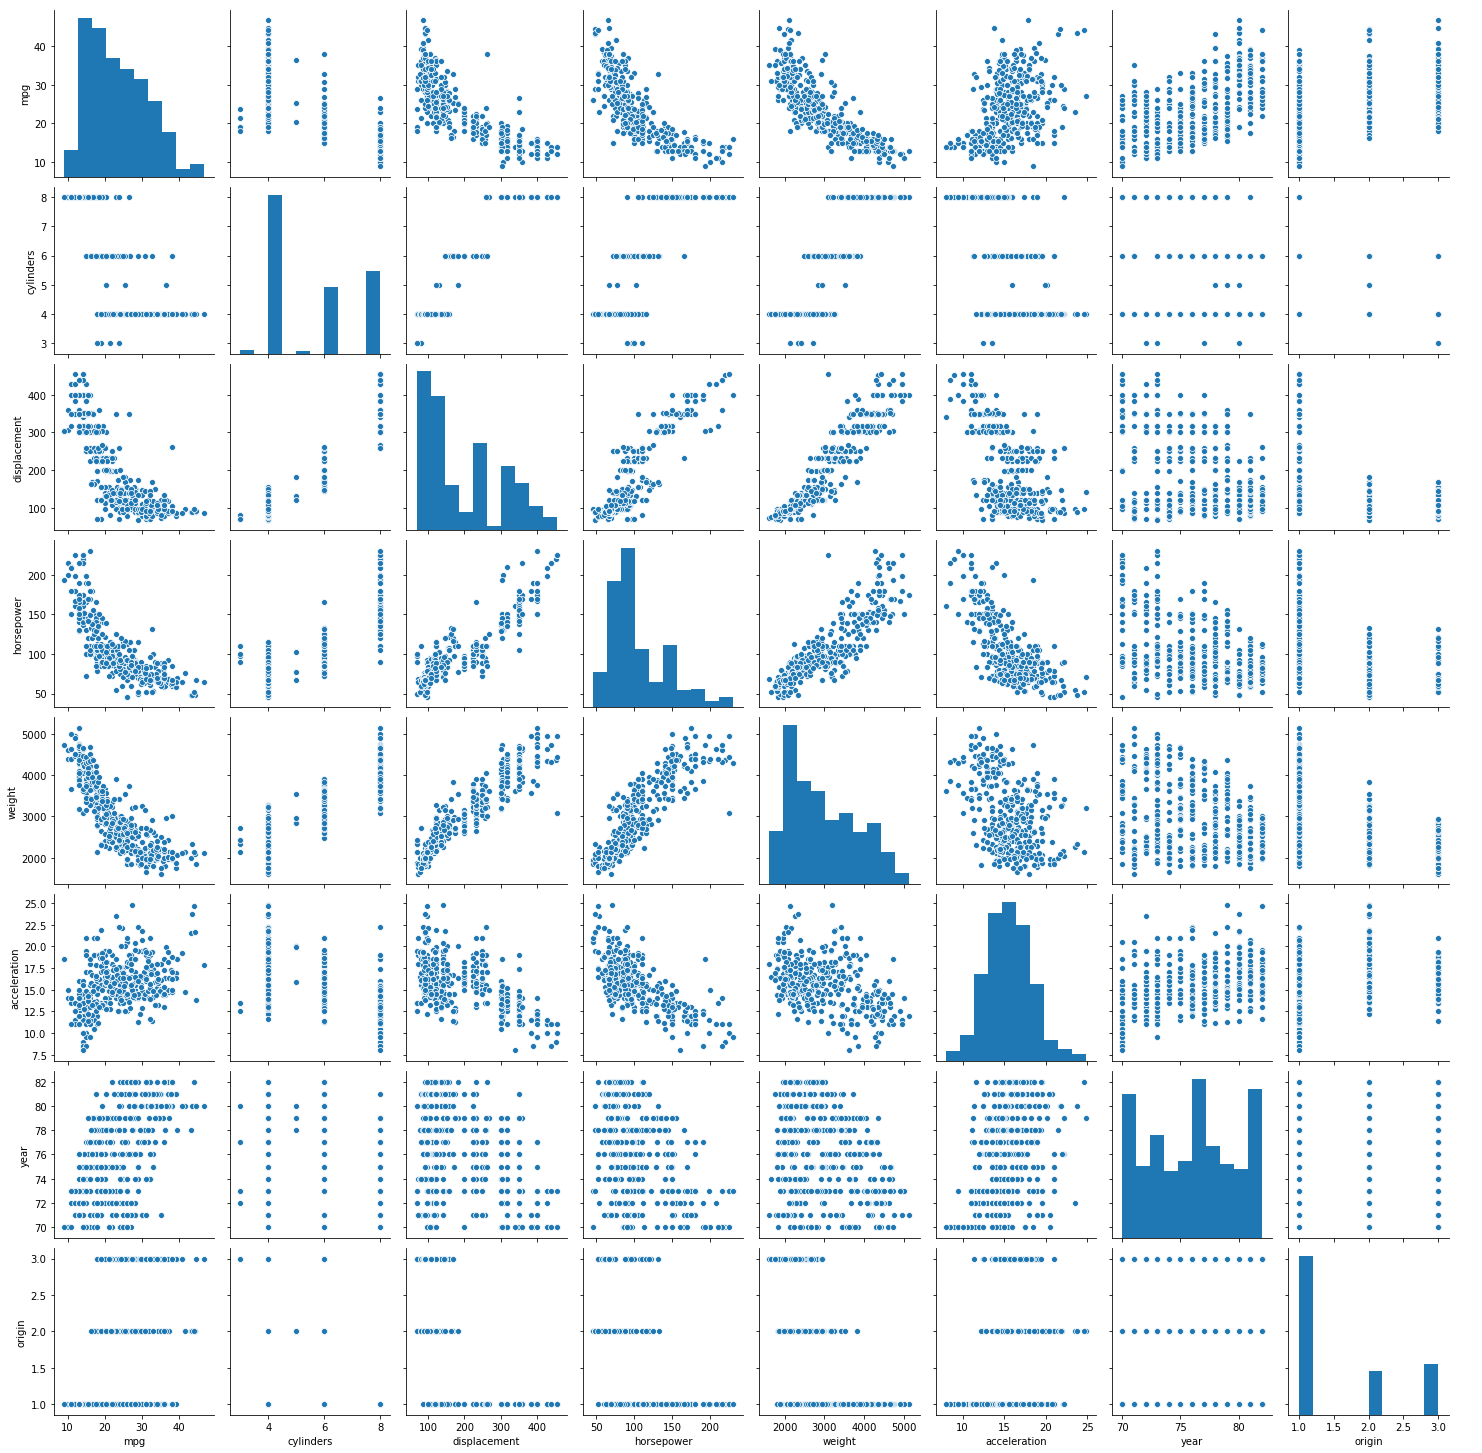

In [11]:
# First we will get the pair plot to see which variables are continuous
sns.pairplot(auto)
plt.show()

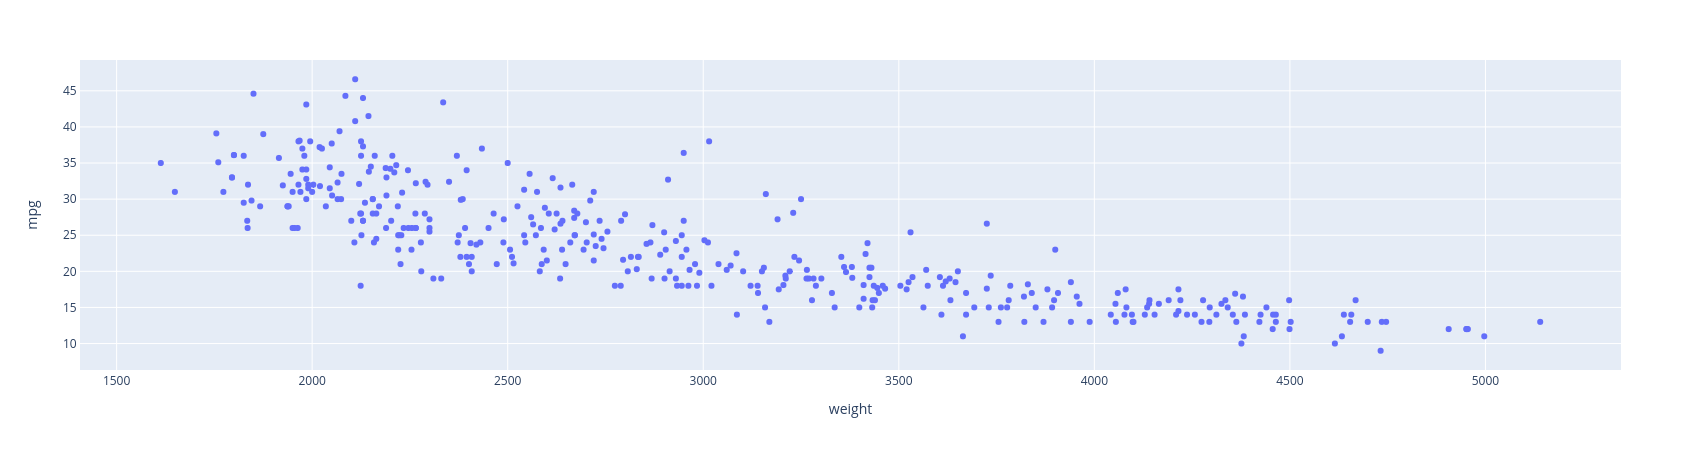

In [12]:
# We are going to use the weight as the feature and mpg as the target
# We are plotting it using plotly
dataset = auto[['weight', 'mpg']]
px.scatter(dataset, x='weight', y='mpg')

In [13]:
# We select the feature and the target from the dataframe called dataset
target = dataset['mpg']
features = dataset['weight']

# Perform test train split with test_size = 0.2 and random state = 2
train_x, test_x, train_y, test_y = train_test_split(features,target, test_size=0.2, random_state=2)

# Use np.newaxis to add a dimension to the training and testing sets. This is required to run fit transform for Polynomial features
# and to run Fit for linear regression 
train_x = train_x.values[:, np.newaxis]
train_y = train_y.values[:, np.newaxis]

test_x = test_x.values[:, np.newaxis]
test_y = test_y.values[:, np.newaxis]

# Generate polynomial features, generate 2nd order features
num_features = 2
poly = PolynomialFeatures(num_features)

# Use fit transform on the features of the training set  to get poly features
poly_features = poly.fit_transform(train_x)



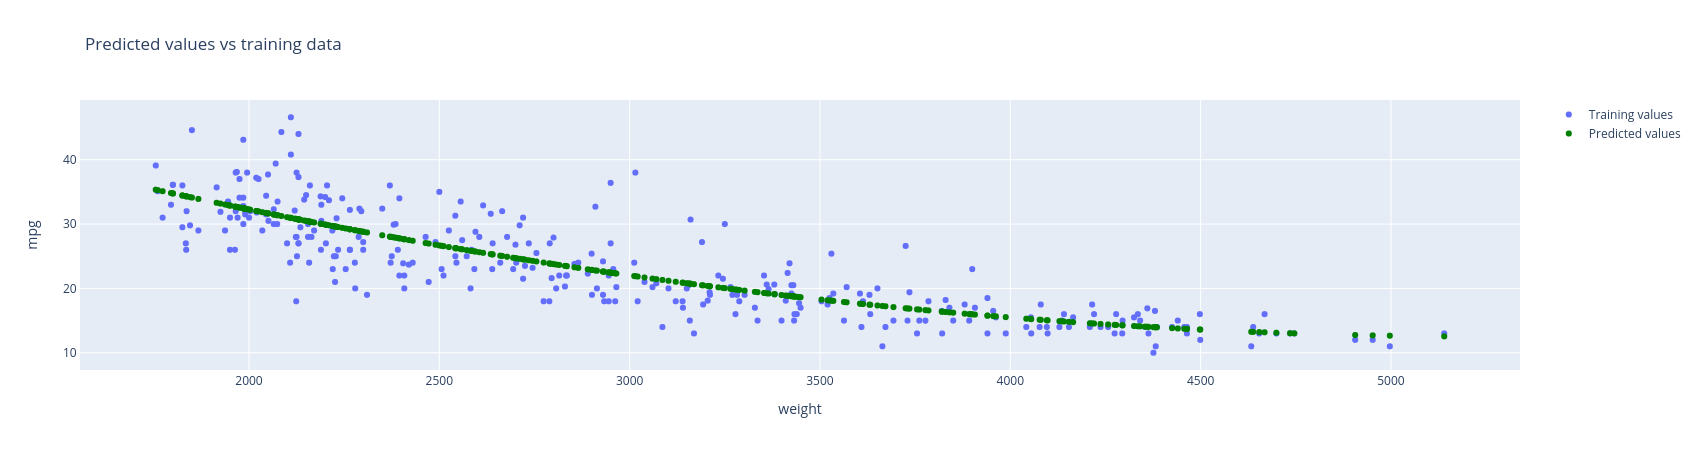

In [18]:
# Perform linear regression with poly features as the x input and get predicted values base on poly features
lr_poly = LinearRegression()
lr_poly.fit(poly_features, train_y)
predicted_values = lr_poly.predict(poly_features)

# Visualizing the predicted values and the actual y values
# Input the x and y values for the plot, the x and y will be the raw training data and labels from the data frame dataset. You can use train_x and train_y
# but you will need to use ravel plot using plotly 
training_data = go.Scatter(x=train_x.ravel(), y=train_y.ravel(), name='Training values',  mode='markers')
predicted_points = go.Scatter(x=train_x.ravel(), y=predicted_values.ravel(), name='Predicted values',  mode='markers', marker= {'color':'green'})

fig = go.Figure(data = [training_data, predicted_points])
fig.update_layout(title="Predicted values vs training data", xaxis_title="weight", yaxis_title="mpg")
fig.show()


<img src="../../../images/poly_regression_lab_plt1.png"><img>

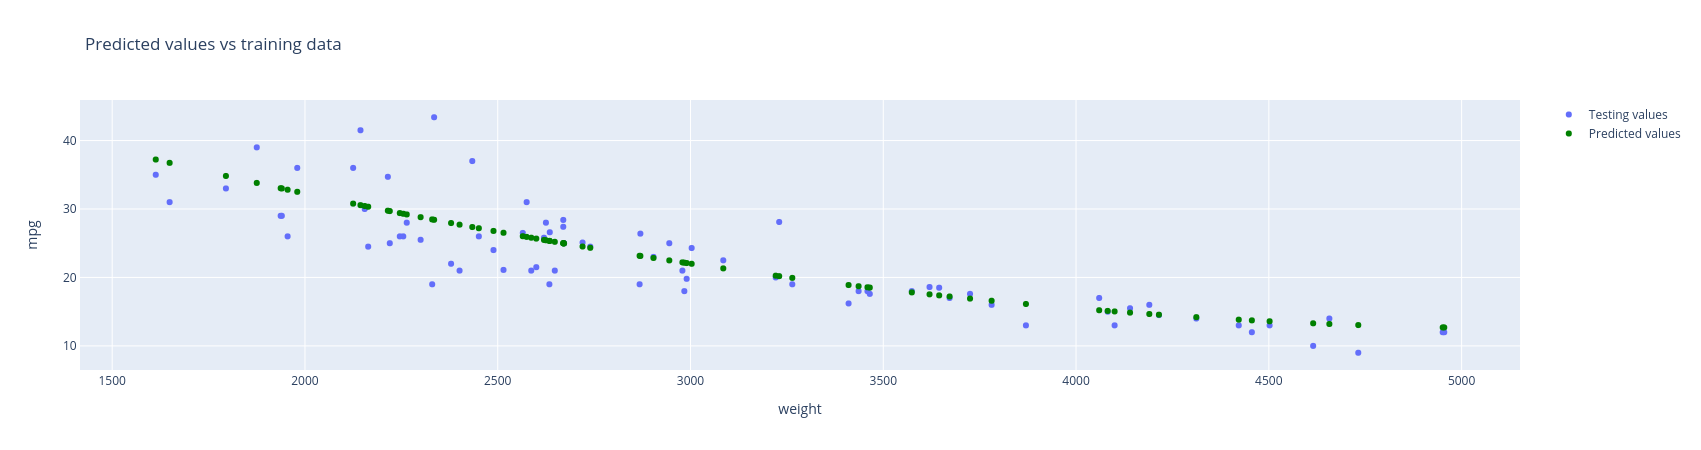

In [21]:
# Convert test_x to poly features and run predict on lr_poly to get predicted_values_test
poly_features_test = poly.fit_transform(test_x)
predicted_values_test = lr_poly.predict(poly_features_test)

# Similar to the plot above, use test_x and y and ravel
testing_data = go.Scatter(x=test_x.ravel(), y=test_y.ravel(), name='Testing values',  mode='markers')
predicted_points_test = go.Scatter(x=test_x.ravel(), y=predicted_values_test.ravel(), name='Predicted values',  mode='markers', marker= {'color':'green'})

fig = go.Figure(data = [testing_data, predicted_points_test])
fig.update_layout(title="Predicted values vs training data", xaxis_title="weight", yaxis_title="mpg")
fig.show()

<img src="../../../images/poly_regression_lab_plt2.png"><img>

Next lets get the Root mean squae error metric for this analysis

In [16]:
# Take the square root of the mean square error mertic to get rmse
rmse_training = np.sqrt(mean_squared_error(train_y, predicted_values))
rmse_testing = np.sqrt(mean_squared_error(test_y, predicted_values_test))
print("Prediction on training set {:.2f}".format(rmse_training))
print("Prediction on testing set {:.2f}".format(rmse_testing))


Prediction on training set 4.19
Prediction on testing set 4.04
